In [47]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [164]:
output_folder = 'output_control'
nmda = h5py.File('./{}/inmda_report.h5'.format(output_folder),'r')
v = h5py.File('./{}/v_report.h5'.format(output_folder),'r')
hva = h5py.File('./{}/Ca_HVA.ica_report.h5'.format(output_folder),'r')
lva = h5py.File('./{}/Ca_LVAst.ica_report.h5'.format(output_folder),'r')
ih = h5py.File('./{}/Ih.ihcn_report.h5'.format(output_folder),'r')
na = h5py.File('./{}/NaTa_t.gNaTa_t_report.h5'.format(output_folder),'r')

spks = h5py.File('./{}/spikes.h5'.format(output_folder),'r')
spktimes = spks['spikes']['biophysical']['timestamps'][:]
spkinds = np.sort((spktimes*10).astype(int))

In [81]:
segs = pd.read_csv('L5Segments.csv')
segs_degrees = pd.read_csv('SegmentsDegrees.csv').groupby(['Type','Sec ID'])['Degrees'].max().reset_index()
segs['segmentID'] = segs.index
segs = segs.set_index(['Type','Sec ID']).join(segs_degrees.set_index(['Type','Sec ID'])).reset_index()

segs['Sec ID'] = segs['Sec ID'].astype(int)
segs['X'] = segs['X'].astype(float)
segs['Elec_distanceQ'] = 'None'

segs.loc[segs.Type=='dend','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='dend','Elec_distance'], 10, labels=False)
segs.loc[segs.Type=='apic','Elec_distanceQ'] = pd.qcut(segs.loc[segs.Type=='apic','Elec_distance'], 10, labels=False)

In [162]:
na_df = pd.read_csv('na_df.csv')

In [165]:
for i in np.random.choice(na_df[(na_df.na_lower_bound>20) & (na_df.na_lower_bound<1400000)].index,10000):
    seg = na_df.loc[i,'segmentID']
    if not pd.isnull(na_df.loc[i,'na_lower_bound']):
        spkt = int(na_df.loc[i,'na_lower_bound'])
        trace = na['report']['biophysical']['data'][spkt-10:spkt+10,seg]
        peak_value = np.max(trace)
        half_peak = peak_value/2
        duration = np.arange(0,20)[trace>half_peak] + spkt - 10
        na_df.loc[i,'duration_low'] = duration[0]
        na_df.loc[i,'duration_high'] = duration[-1]
        na_df.loc[i,'peak_value'] = peak_value
    else:
        na_df.loc[i,'duration_low'] = np.nan
        na_df.loc[i,'duration_high'] = np.nan
        na_df.loc[i,'peak_value'] = np.nan
        
na_df['duration'] = (na_df['duration_high'] - na_df['duration_low'] + 1)/10

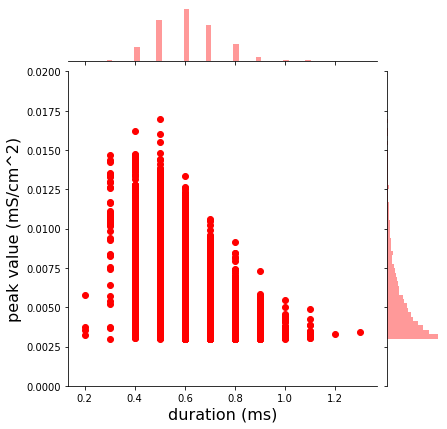

In [173]:
h = sns.jointplot(data=na_df[~pd.isnull(na_df.duration_low)], x="duration", y="peak_value",color='red')
h.set_axis_labels('duration (ms)', 'peak value (mS/cm^2)', fontsize=16)
h.ax_marg_y.set_ylim(0, 0.02)
plt.savefig('na_df.png')

In [185]:
np.random.choice(na_df[~pd.isnull(na_df.duration_low)]['segmentID'].unique())

1348

,Unnamed: 0,segmentID,na_lower_bound,duration_low,duration_high,peak_value,duration
445867,0,1348,2103.0,NaN,NaN,NaN,NaN
445868,1,1348,3923.0,NaN,NaN,NaN,NaN
445869,2,1348,5232.0,NaN,NaN,NaN,NaN
445870,3,1348,8329.0,NaN,NaN,NaN,NaN
445871,4,1348,11394.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
446311,444,1348,1477147.0,NaN,NaN,NaN,NaN
446312,445,1348,1477901.0,NaN,NaN,NaN,NaN
446313,446,1348,1478152.0,NaN,NaN,NaN,NaN
446314,447,1348,1482131.0,NaN,NaN,NaN,NaN


In [193]:
na_df[(na_df.segmentID==1348)&(na_df.na_lower_bound>=11000)&(na_df.na_lower_bound<=15000)]['na_lower_bound']

445871    11394.0
Name: na_lower_bound, dtype: float64

In [201]:
nmda_df[(nmda_df.segmentID==1348)&(nmda_df.nmda_lower_bound>=11000)&(nmda_df.nmda_lower_bound<=15000)]['nmda_lower_bound']

612611    13009.0
612612    13804.0
Name: nmda_lower_bound, dtype: float64

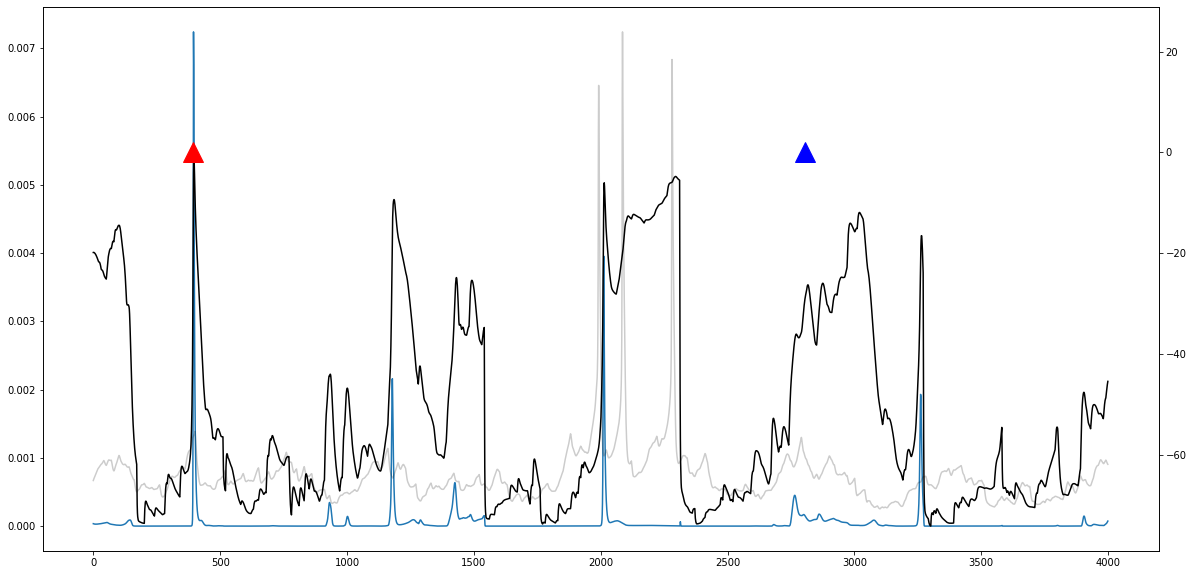

In [204]:
plt.figure(figsize=(20,10))
plt.plot(na['report']['biophysical']['data'][11000:15000,1348])
#plt.plot(nmda['report']['biophysical']['data'][11000:15000,1348])

plt.twinx()
plt.plot(v['report']['biophysical']['data'][11000:15000,1348],color='k')
plt.plot(v['report']['biophysical']['data'][11000:15000,0],color='k',alpha=0.2)
plt.plot(11394-11000,0,'r^',markersize=20)
#plt.plot(13009-11000,0,'b^',markersize=20)
plt.plot(13804-11000,0,'b^',markersize=20)

In [15]:
nmda_df = pd.read_csv('nmda_df.csv')

In [17]:
nmda_df[~pd.isnull(nmda_df.nmda_lower_bound)].head()

,Unnamed: 0,segmentID,nmda_lower_bound,nmda_upper_bound,mag
15,0,16,547465.0,547483.0,-0.008827
16,1,16,842439.0,842443.0,-0.001725
17,2,16,1195362.0,1195422.0,-0.028967
18,0,17,208893.0,209232.0,-0.327073
19,1,17,383685.0,383715.0,-0.005025


In [30]:
nmda_df['duration'] = (nmda_df['nmda_upper_bound'] - nmda_df['nmda_lower_bound'])/10

In [31]:
nmda_df[(nmda_df.mag<-0.1)]

,Unnamed: 0,segmentID,nmda_lower_bound,nmda_upper_bound,mag,duration
18,0,17,208893.0,209232.0,-0.327073,33.9
23,5,17,826482.0,826762.0,-0.200705,28.0
26,8,17,1017333.0,1017436.0,-0.134274,10.3
29,11,17,1196266.0,1196578.0,-0.281156,31.2
30,12,17,1448468.0,1448698.0,-0.184921,23.0


In [40]:
nmda_df[(nmda_df.mag<-0.1)&(nmda_df.duration<250)]['duration'].min()

2.2

In [52]:
nmda_df['log_duration'] = np.log(nmda_df['duration'])
nmda_df['log_mag'] = np.log(np.abs(nmda_df['mag']))

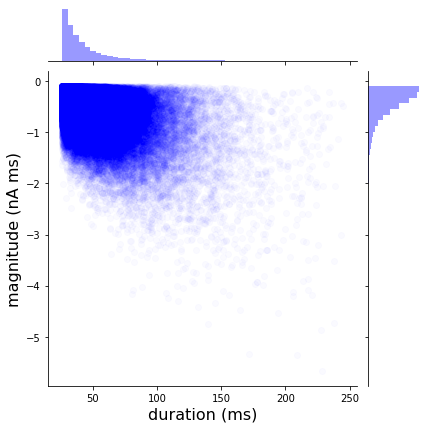

In [174]:
h = sns.jointplot(data=nmda_df[(nmda_df.mag<-0.1)&
                               (nmda_df.duration<250)&
                               (nmda_df.duration>26)], x="duration", y="mag",alpha=0.02, color='blue')
h.set_axis_labels('duration (ms)', 'magnitude (nA ms)', fontsize=16)
plt.savefig('nmda_df.png')

In [56]:
nmda_df[nmda_df.mag<-1]

,Unnamed: 0,segmentID,nmda_lower_bound,nmda_upper_bound,mag,duration,log_duration,log_mag
2220,197,32,1179433.0,1180167.0,-1.244797,73.4,4.295924,0.218972
5111,93,59,692624.0,693132.0,-1.029282,50.8,3.927896,0.028862
5219,8,60,76043.0,76576.0,-1.106547,53.3,3.975936,0.101244
5236,25,60,206041.0,206621.0,-1.693845,58.0,4.060443,0.527001
5237,26,60,208790.0,209252.0,-1.115850,46.2,3.832980,0.109617
...,...,...,...,...,...,...,...,...
1192363,200,2368,1193293.0,1193867.0,-1.185613,57.4,4.050044,0.170260
1192389,226,2368,1388948.0,1389555.0,-1.459856,60.7,4.105944,0.378337
1192626,221,2369,1283620.0,1284400.0,-1.427306,78.0,4.356709,0.355789
1193842,120,2374,661975.0,662744.0,-1.111784,76.9,4.342506,0.105966


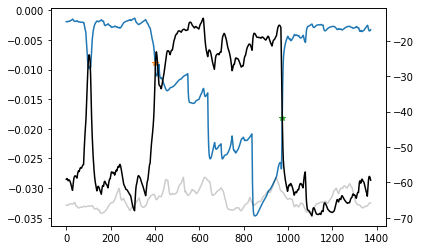

In [63]:
seg = 2368
lower_bound = 1193293
upper_bound = 1193867
plt.plot(nmda['report']['biophysical']['data'][lower_bound-400:upper_bound+400,seg])
plt.plot(400,nmda['report']['biophysical']['data'][lower_bound,seg],'*')
plt.plot(400+(upper_bound-lower_bound),nmda['report']['biophysical']['data'][upper_bound,seg],'*')
plt.twinx()
plt.plot(v['report']['biophysical']['data'][lower_bound-400:upper_bound+400,seg],color='k')
plt.plot(v['report']['biophysical']['data'][lower_bound-400:upper_bound+400,0],color='k',alpha=0.2)

# Ca

In [64]:
ca_df = pd.read_csv('ca_df.csv')

In [105]:
ca_df['dist_from_soma_spike'] = ca_df['ca_lower_bound'].apply(lambda x: np.min(np.abs(x-spkinds)))

In [76]:
ca_df['duration'] = (ca_df['ca_upper_bound'] - ca_df['ca_lower_bound'])/10

In [148]:
ca_df['mag_dur'] = ca_df['mag']/ca_df['duration']

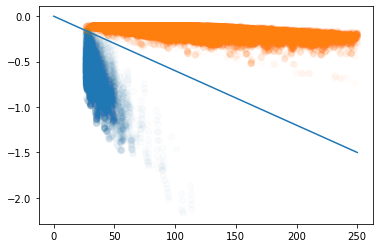

In [151]:
plt.scatter(ca_df[(ca_df.mag<-0.1)&
                  (ca_df.duration<250)&
                  (ca_df.duration>26)&
                  (ca_df.dist_from_soma_spike>50)&
                  (ca_df.mag_dur<-0.006)]['duration'],
           ca_df[(ca_df.mag<-0.1)&
                               (ca_df.duration<250)&
                               (ca_df.duration>26)&
                             (ca_df.dist_from_soma_spike>50)&
                  (ca_df.mag_dur<-0.006)]['mag'],alpha=0.02)
plt.scatter(ca_df[(ca_df.mag<-0.1)&
                  (ca_df.duration<250)&
                  (ca_df.duration>26)&
                  (ca_df.dist_from_soma_spike>50)&
                  (ca_df.mag_dur>-0.006)]['duration'],
           ca_df[(ca_df.mag<-0.1)&
                               (ca_df.duration<250)&
                               (ca_df.duration>26)&
                             (ca_df.dist_from_soma_spike>50)&
                  (ca_df.mag_dur>-0.006)]['mag'],alpha=0.02)
plt.plot(np.array([0,50,100,150,200,250]),-0.006*np.array([0,50,100,150,200,250]))

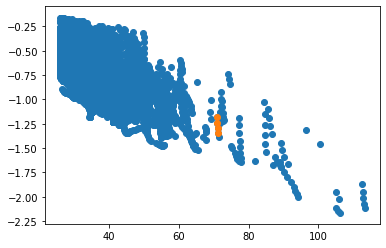

In [211]:
plt.scatter(ca_df[(ca_df.mag<-0.1)&
                               (ca_df.duration<250)&
                               (ca_df.duration>26)&
                             (ca_df.dist_from_soma_spike>50)&
                         (ca_df.mag_dur<-0.006)]['duration'],
           ca_df[(ca_df.mag<-0.1)&
                               (ca_df.duration<250)&
                               (ca_df.duration>26)&
                             (ca_df.dist_from_soma_spike>50)&
                         (ca_df.mag_dur<-0.006)]['mag'])
plt.scatter(ca_df[(ca_df.mag<-0.1)&
      (ca_df.duration<71.5)&
      (ca_df.duration>70)&
      (ca_df.dist_from_soma_spike>50)&
      (ca_df.mag_dur<-0.006)]['duration'],
            ca_df[(ca_df.mag<-0.1)&
      (ca_df.duration<71.5)&
      (ca_df.duration>70)&
      (ca_df.dist_from_soma_spike>50)&
      (ca_df.mag_dur<-0.006)]['mag'])

Text(0, 0.5, 'current (nA)')

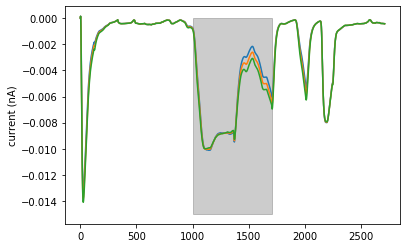

In [227]:
for i in [1731,1732,1733]:
    trace = hva['report']['biophysical']['data'][902659-1000:903368+1000,i] + \
        lva['report']['biophysical']['data'][902659-1000:903368+1000,i] + \
        ih['report']['biophysical']['data'][902659-1000:903368+1000,i]

    plt.plot(trace/3,label='segment {}'.format(i-1730))
plt.fill_between([1000,1000+(903368-902659)],-0.015,0,color='k',alpha=0.2)
plt.ylabel('current (nA)')

In [212]:
ca_df[(ca_df.mag<-0.1)&
      (ca_df.duration<71.5)&
      (ca_df.duration>70)&
      (ca_df.dist_from_soma_spike>50)&
      (ca_df.mag_dur<-0.006)]

,Unnamed: 0,segmentID,ca_lower_bound,ca_upper_bound,mag,duration,near_soma_spike,dist_from_soma_spike,mag_x_dur,mag_dur
380105,360,1730,902659.0,903368.0,-1.184604,70.9,0,52.0,-83.988389,-0.016708
380674,372,1731,902658.0,903368.0,-1.239493,71.0,0,53.0,-88.004023,-0.017458
381268,388,1732,902656.0,903368.0,-1.292777,71.2,0,55.0,-92.045702,-0.018157
381876,395,1733,902654.0,903368.0,-1.343200,71.4,0,57.0,-95.904505,-0.018812


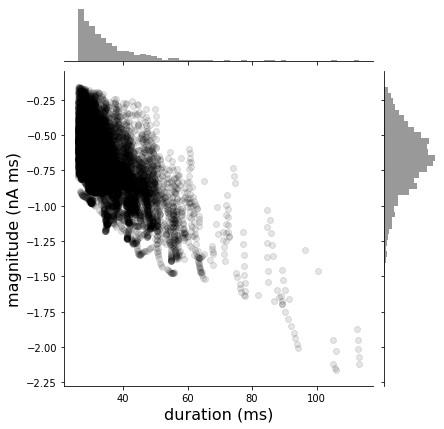

In [175]:
h = sns.jointplot(data=ca_df[(ca_df.mag<-0.1)&
                               (ca_df.duration<250)&
                               (ca_df.duration>26)&
                             (ca_df.dist_from_soma_spike>50)&
                         (ca_df.mag_dur<-0.006)], x="duration", y="mag",alpha=0.1, color='black')
h.set_axis_labels('duration (ms)', 'magnitude (nA ms)', fontsize=16)
plt.savefig('ca_df.png')

In [155]:
segs_lt = ca_df[(ca_df.duration<50) & (ca_df.mag<-0.5) & (ca_df.dist_from_soma_spike>50) & (ca_df.mag_dur<-0.006)]['segmentID'].unique()
segs_gt = ca_df[(ca_df.duration<50) & (ca_df.mag<-0.5) & (ca_df.dist_from_soma_spike>50) & (ca_df.mag_dur>-0.006)]['segmentID'].unique()

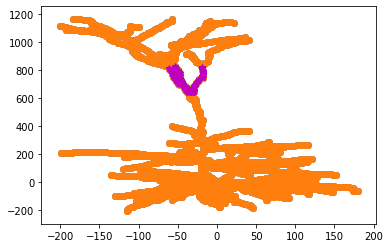

In [157]:
plt.scatter(segs['Coord X'], segs['Coord Y'])
plt.plot(segs.loc[segs.segmentID.isin(segs_lt),'Coord X'],segs.loc[segs.segmentID.isin(segs_lt),'Coord Y'],'m*')
plt.scatter(segs['Coord X'], segs['Coord Y'])
plt.plot(segs.loc[segs.segmentID.isin(segs_gt),'Coord X'],segs.loc[segs.segmentID.isin(segs_gt),'Coord Y'],'r*')

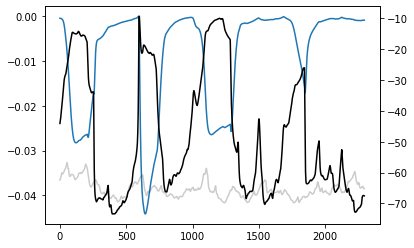

In [115]:
seg = 1852
low = 1461407
high = 1461703
plt.plot(hva['report']['biophysical']['data'][low-1000:high+1000,seg]+\
         lva['report']['biophysical']['data'][low-1000:high+1000,seg]+\
         ih['report']['biophysical']['data'][low-1000:high+1000,seg])
plt.twinx()
plt.plot(v['report']['biophysical']['data'][low-1000:high+1000,seg],color='k')
plt.plot(v['report']['biophysical']['data'][low-1000:high+1000,0],color='k',alpha=0.2)

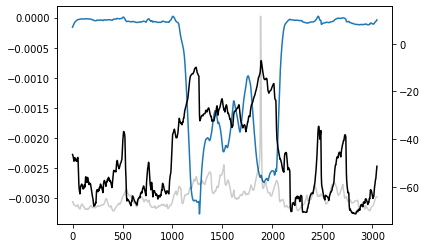

In [91]:
plt.plot(hva['report']['biophysical']['data'][162647-1000:163693+1000,1070]+\
         lva['report']['biophysical']['data'][162647-1000:163693+1000,1070]+\
         ih['report']['biophysical']['data'][162647-1000:163693+1000,1070])
plt.twinx()
plt.plot(v['report']['biophysical']['data'][162647-1000:163693+1000,1070],color='k')
plt.plot(v['report']['biophysical']['data'][162647-1000:163693+1000,0],color='k',alpha=0.2)

In [462]:
from functools import partial
import scipy.stats as st

levy_dist = partial(st.levy_stable.rvs, alpha=1.37, beta=-1.00, loc=0.92, scale=0.44, size=1)
levy_dist2 = partial(st.levy_stable.rvs, alpha=1.37, beta=-1.00, loc=0.92/2, scale=0.44, size=1)
levy_dist3 = partial(st.levy_stable.rvs, alpha=1.37, beta=-1.00, loc=0.92/10, scale=0.44, size=1)

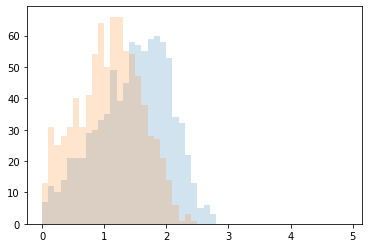

In [465]:
x = levy_dist(size=1000)
x[x<0] = 0
plt.hist(x[x>0],bins=np.arange(0,5,.1),alpha=0.2)
x = levy_dist2(size=1000)
x[x<0] = 0
plt.hist(x[x>0],bins=np.arange(0,5,.1),alpha=0.2)
#x = levy_dist3(size=1000)
#x[x<0] = 0
#plt.hist(x[x>0],bins=np.arange(0,5,.1),alpha=0.2)
plt.show()

In [415]:
f = h5py.File('exc_stim_spikes_control.h5','r')

In [416]:
from raster_maker import SonataWriter

In [417]:
df = pd.DataFrame(np.concatenate((f['spikes']['exc_stim']['node_ids'][:].reshape(-1,1),
                             f['spikes']['exc_stim']['timestamps'][:].reshape(-1,1)),axis=1),
                  columns=['node_id','timestamps'])

In [418]:
fname = 'exc_stim_spikes_50p.h5'
writer = SonataWriter(fname, ["spikes", "exc_stim"], ["timestamps", "node_ids"], [np.float, np.int])

for i in np.unique(f['spikes']['exc_stim']['node_ids'][:]):
    #import pdb; pdb.set_trace()
    ts = df.loc[df.node_id==i,'timestamps'].values
    ts_redux = np.random.choice(ts,int(ts.shape[0]*0.5))
    if len(ts_redux)==0:
        ts_redux = ts
    writer.append_repeat("node_ids", i + 0, len(ts_redux))
    writer.append_ds(ts_redux + 0, "timestamps")

In [419]:
writer.close()

In [427]:
f = h5py.File('exc_stim_spikes_control.h5','r')
ex = h5py.File('exc_stim_spikes.h5','r')

In [428]:
df = pd.DataFrame(np.concatenate((f['spikes']['exc_stim']['node_ids'][:].reshape(-1,1), 
                                  f['spikes']['exc_stim']['timestamps'][:].reshape(-1,1)),axis=1),
                  columns=['node_ids','timestamps'])

df2 = pd.DataFrame(np.concatenate((ex['spikes']['exc_stim']['node_ids'][:].reshape(-1,1), 
                                  ex['spikes']['exc_stim']['timestamps'][:].reshape(-1,1)),axis=1),
                  columns=['node_ids','timestamps'])


In [429]:
df2[df2.node_ids==5135].shape

(49, 2)

In [430]:
df[df.node_ids==5135].shape

(99, 2)

In [436]:
f['spikes']['exc_stim']['node_ids'], f['spikes']['exc_stim']['timestamps']

(<HDF5 dataset "node_ids": shape (713312,), type "<i8">,
 <HDF5 dataset "timestamps": shape (713312,), type "<f8">)

In [437]:
ex['spikes']['exc_stim']['node_ids'], ex['spikes']['exc_stim']['timestamps']

(<HDF5 dataset "node_ids": shape (355397,), type "<i8">,
 <HDF5 dataset "timestamps": shape (355397,), type "<f8">)

In [357]:
fname = 'exc_stim_spikes_150p.h5'
writer = SonataWriter(fname, ["spikes", "exc_stim"], ["timestamps", "node_ids"], [np.float, np.int])

for i in np.arange(0,np.unique(f['spikes']['exc_stim']['node_ids'][:]).shape[0]):
    ts = df.loc[df.node_id==i,'timestamps'].values
    extras = np.random.choice(ts,int(ts.shape[0]*0.5)) + np.random.uniform(low=-10,high=10,size=int(ts.shape[0]*0.5))
    ts_redux = np.concatenate((ts,extras))

    writer.append_repeat("node_ids", i + 0, len(ts_redux))
    writer.append_ds(ts_redux + 0, "timestamps")
    

In [363]:
f50 = h5py.File('exc_stim_spikes_50p.h5','r')
f150 = h5py.File('exc_stim_spikes_150p.h5','r')

In [364]:
np.median(pd.DataFrame(f['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30)

4.333333333333333

In [365]:
np.median(pd.DataFrame(f50['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30)

2.1666666666666665

In [366]:
np.median(pd.DataFrame(f150['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30)

6.5

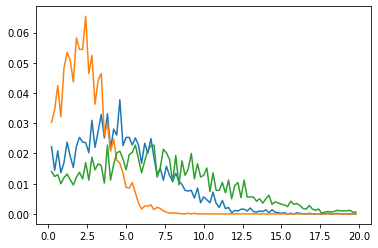

In [368]:
y,e = np.histogram(pd.DataFrame(f['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30,
         bins=np.arange(0,20,0.2))
plt.plot(e[1:],y/np.sum(y))
y,e = np.histogram(pd.DataFrame(f50['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30,
         bins=np.arange(0,20,0.2))
plt.plot(e[1:],y/np.sum(y))
y,e = np.histogram(pd.DataFrame(f150['spikes']['exc_stim']['node_ids'][:])[0].value_counts().values/30,
         bins=np.arange(0,20,0.2))
plt.plot(e[1:],y/np.sum(y))
plt.show()

In [347]:
f = h5py.File('./output/spikes.h5','r')
g = h5py.File('./output_control/spikes.h5','r')

In [348]:
f['spikes']['biophysical']['timestamps'][0:10], g['spikes']['biophysical']['timestamps'][0:10]

(array([4.00000e+00, 9.63089e+04, 9.63163e+04, 9.63235e+04, 9.72523e+04,
        9.72585e+04, 9.74758e+04, 9.76168e+04, 9.77256e+04, 9.79906e+04]),
 array([4.00000e+00, 9.63089e+04, 9.63163e+04, 9.63235e+04, 9.72523e+04,
        9.72585e+04, 9.74758e+04, 9.76168e+04, 9.77256e+04, 9.79906e+04]))

In [369]:
f = h5py.File('exc_stim_spikes.h5','r')

In [375]:
f['spikes']['exc_stim']['node_ids'], f['spikes']['exc_stim']['timestamps']

(<HDF5 dataset "node_ids": shape (350277,), type "<i8">,
 <HDF5 dataset "timestamps": shape (350277,), type "<f8">)

In [376]:
g = h5py.File('exc_stim_spikes_control.h5','r')

In [377]:
g['spikes']['exc_stim']['node_ids'], g['spikes']['exc_stim']['timestamps']

(<HDF5 dataset "node_ids": shape (713312,), type "<i8">,
 <HDF5 dataset "timestamps": shape (713312,), type "<f8">)

In [379]:
np.unique(g['spikes']['exc_stim']['node_ids'][:])

array([   0,    1,    2, ..., 5219, 5220, 5221])

In [380]:
np.unique(f['spikes']['exc_stim']['node_ids'][:])

array([   0,    1,    2, ..., 5132, 5133, 5134])

In [500]:
f = h5py.File('./output_low/exc_stim_spikes.h5','r')
g = h5py.File('./output_lowmed/exc_stim_spikes.h5','r')
h = h5py.File('./output_med/exc_stim_spikes.h5','r')
i = h5py.File('./output_medhigh/exc_stim_spikes.h5','r')
j = h5py.File('./output_high/exc_stim_spikes.h5','r')

fo = h5py.File('./output_low/spikes.h5','r')
go = h5py.File('./output_lowmed/spikes.h5','r')
ho = h5py.File('./output_med/spikes.h5','r')
io = h5py.File('./output_medhigh/spikes.h5','r')
jo = h5py.File('./output_high/spikes.h5','r')

In [501]:
fo['spikes']['biophysical']['timestamps'][:].shape[0]/30

0.5

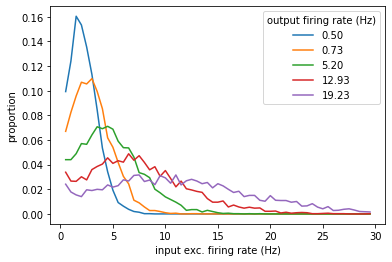

In [508]:
df = pd.DataFrame(f['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
plt.plot(np.arange(0,30,0.5)[1:],
         y/np.sum(y),
         label='{x:0.2f}'.format(x=fo['spikes']['biophysical']['timestamps'][:].shape[0]/30))

df = pd.DataFrame(g['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
plt.plot(np.arange(0,30,0.5)[1:],
         y/np.sum(y),
         label='{x:0.2f}'.format(x=go['spikes']['biophysical']['timestamps'][:].shape[0]/30))

df = pd.DataFrame(h['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
plt.plot(np.arange(0,30,0.5)[1:],
         y/np.sum(y),
         label='{x:0.2f}'.format(x=ho['spikes']['biophysical']['timestamps'][:].shape[0]/30))

df = pd.DataFrame(i['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
plt.plot(np.arange(0,30,0.5)[1:],
         y/np.sum(y),
         label='{x:0.2f}'.format(x=io['spikes']['biophysical']['timestamps'][:].shape[0]/30))

df = pd.DataFrame(j['spikes']['exc_stim']['node_ids'][:],columns=['node_ids'])
y,_ = np.histogram(df['node_ids'].value_counts().values/30,bins=np.arange(0,30,0.5))
plt.plot(np.arange(0,30,0.5)[1:],
         y/np.sum(y),
         label='{x:0.2f}'.format(x=jo['spikes']['biophysical']['timestamps'][:].shape[0]/30))

plt.xlabel('input exc. firing rate (Hz)')
plt.ylabel('proportion')

plt.legend(title='output firing rate (Hz)')

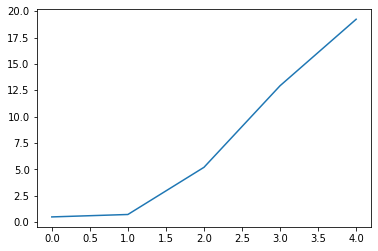

In [506]:
plt.plot([0.50,0.73,5.20,12.93,19.23])

In [486]:

f['spikes']['biophysical']['timestamps'].shape[0]/30,\
g['spikes']['biophysical']['timestamps'].shape[0]/30,\
h['spikes']['biophysical']['timestamps'].shape[0]/30,\
i['spikes']['biophysical']['timestamps'].shape[0]/30,\
j['spikes']['biophysical']['timestamps'].shape[0]/30

(0.5, 0.7333333333333333, 5.2, 12.933333333333334, 19.233333333333334)

In [478]:
h['spikes']['biophysical']['timestamps'].shape[0]/30

5.2

KeyError: "Unable to open object (object 'spikes' doesn't exist)"

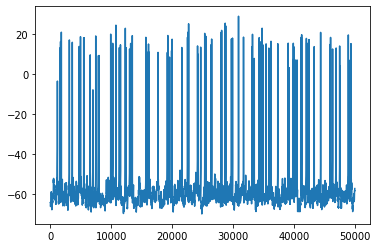

In [477]:
plt.plot(i['report']['biophysical']['data'][50000:100000,0])